In [381]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [382]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [383]:
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [384]:
db = pd.read_csv("/content/drive/MyDrive/DSBDAL_Pract/Social_Network_Ads.csv")

In [385]:
db.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [386]:
db.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [387]:
print(db.dtypes)

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


In [388]:
numeric_dataset = db.select_dtypes(include=['number'])  # Select only numeric columns
db=numeric_dataset

In [389]:
corr = db.corr()

In [390]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np)
mask[np.triu_indices_from(mask)] = True

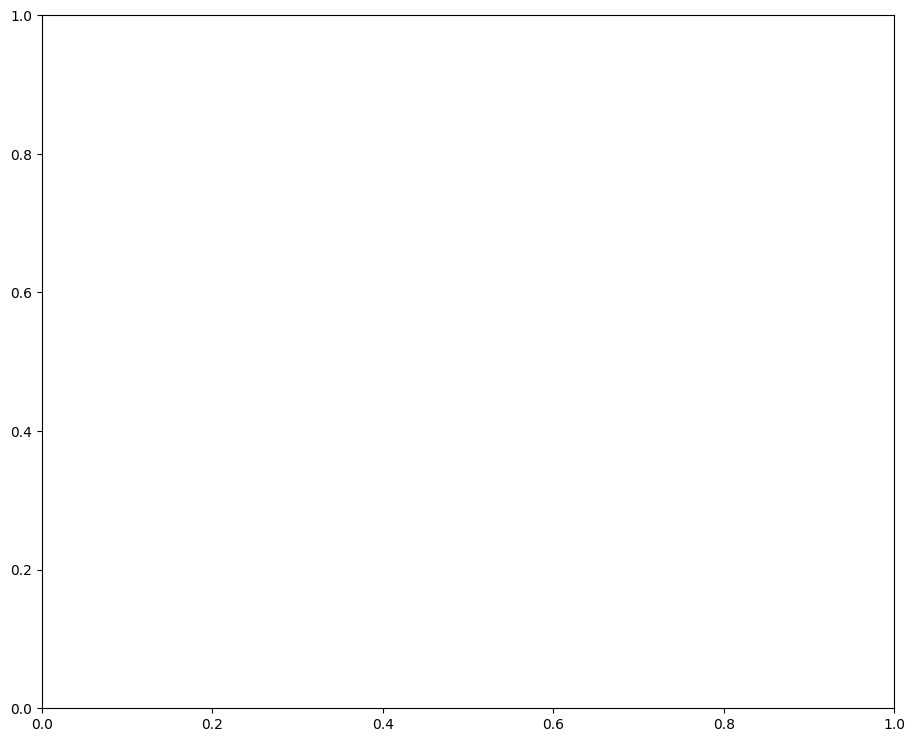

In [391]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

In [392]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

<Axes: >

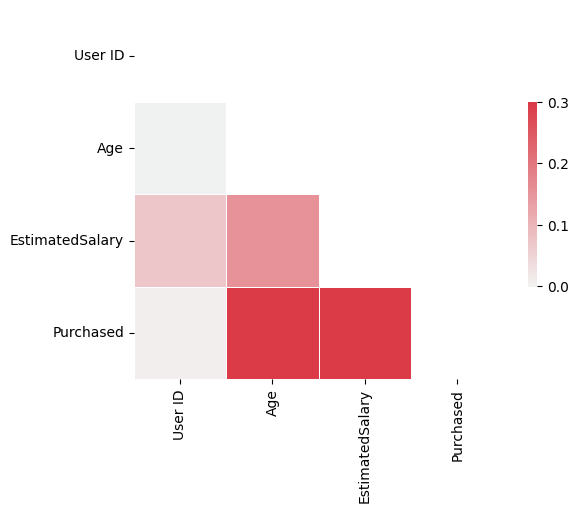

In [393]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [394]:
#defining our features and target variable
X = db[["Age", "EstimatedSalary"]].values
y = db["Purchased"].values

In [395]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

In [396]:
#Feature scaling as range of estimated salary and age is different
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [397]:
#Classifying and prediction
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) #Logistic classifier
classifier.fit(X_train, y_train) #fitting the model
y_pred = classifier.predict(X_test) #predicting test results

In [398]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57  1]
 [ 5 17]]


In [399]:
#using K-Fold cross validation to get the mean Accuracy
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(accuracies.mean(),accuracies.std()))

Mean Accuracy: 0.82, Std of Accuracy: 0.10


In [400]:
# A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear pic

In [401]:
#Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

In [402]:
#True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belong

In [403]:
#True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actuall

In [404]:
#False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does

In [405]:
#False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actua

In [406]:
#These four outcomes are summarized in a confusion matrix given below.

In [407]:
# Print the Confusion Matrix and slice it into four pieces

In [408]:
tn = confusion_matrix(y_test, y_pred).ravel()
fp = confusion_matrix(y_test, y_pred).ravel()
fn = confusion_matrix(y_test, y_pred).ravel()
tp = confusion_matrix(y_test, y_pred).ravel()

In [409]:
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[57  1]
 [ 5 17]]

True Positives(TP) =  57

True Negatives(TN) =  17

False Positives(FP) =  1

False Negatives(FN) =  5


In [410]:
# How Accurate is our Model?
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn)
print(Accuracy)

[50. 50. 50. 50.]


In [411]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision =precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')

In [412]:
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN) Also known as sensitivity, or True Positive Rate
# F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [413]:
print(precision)
print(recall)
print(f1)

0.925
0.925
0.925
